In [19]:
import pandas as pd
import yfinance as yf
import numpy as np
import time
import matplotlib.pyplot as plt

In [27]:
def get_per(ticker):
    """
    Yahoo FinanceからPERを取得する関数
    """
    stock = yf.Ticker(ticker)
    try:
        per = stock.info['trailingPE']  # PERを取得
    except KeyError:
        per = None  # PERが存在しない場合
    return per

In [2]:
# CSVファイルからティッカーとリターンが入ったデータを読み込む
data_df = pd.read_csv('returns_and_risk_summary.csv')

In [21]:
df_sampled = data_df.sample(frac=0.05, random_state=1)

In [5]:
df_sampled

,Ticker,Mean Return (Annualized),Risk (Annualized Std Dev)
1145,IR,0.414002,0.245483
899,GAB,0.051233,0.167935
1814,REVG,0.432548,0.341275
2105,THQ,-0.014439,0.137026
1614,OMF,0.557955,0.335430
1156,IVT,0.164178,0.257275
17,ACEL,0.308028,0.306169
2089,TEX,0.420344,0.424831
2363,XYF,0.436404,0.682623
525,CRC,0.351141,0.302447


In [28]:
per=get_per('IR')

In [9]:
stock = yf.Ticker('IR')

In [10]:
import requests

def get_per_alpha_vantage(ticker, api_key='Z8YKHIMNPJ86PNJX'):
    url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    if 'PERatio' in data and data['PERatio'] != 'None':
        return float(data['PERatio'])
    else:
        return np.nan

# 使用例
api_key = 'hiuhui'
ticker = 'AAPL'
per = get_per_alpha_vantage(ticker, api_key)
print(f"PER for {ticker}: {per}")

PER for AAPL: nan


In [25]:
get_per_alpha_vantage('AAPL')

nan

In [5]:
# 各ティッカーに対してPERを取得し、新しい列を追加
df_sampled['PER'] = df_sampled['Ticker'].apply(get_per_alpha_vantage)

In [22]:
per = []
for ticker in df_sampled['Ticker']:
    print(ticker)
    per.append(get_per_alpha_vantage(ticker))
    time.sleep(1)

IR
GAB
REVG
THQ
OMF
IVT
ACEL
TEX
XYF
CRC
LZM
GSK
E
COR
CHMI
MUX
MYE
TIXT
EBS
KNX
PL
LAD
GPRK
JWN
JEF
SO
MCN
TGS
SPB
GOF
ORC
EMO
THW
TTI
AMTD
FAM
WNC
TRTX
WRB
BIRK
AMRC
DTC
DRI
BIPC
MQY
NLOP
JLL
JNPR
PDX
NNY
PX
GJP
GDL
AEVA
GF
RGT
FMC
EFC
KTB
BMA
ETO
WPM
OIA
SKE
RYAM
BALL
MTG
APG
ENO
FLR
STM
FBP
CALX
HCI
AGD
HG
CHCT
MSGE
AIR
SBSW
SUPP
AMR
SLGN
VTN
AON
AFL
OXM
AGRO
RQI
AB
HYT
GSBD
CYD
NPWR
VTOL
FSS
CHH
RRAC
LLAP
ET
PEG
CMS
MFC
PBI
INSI
NPV
HR
SNDA
JXN
LUV
RVT
HVT
NOVA
RDN
GME
SRV
MDV
EMR
LNN
FCN


In [23]:
df_sampled['PER'] = per

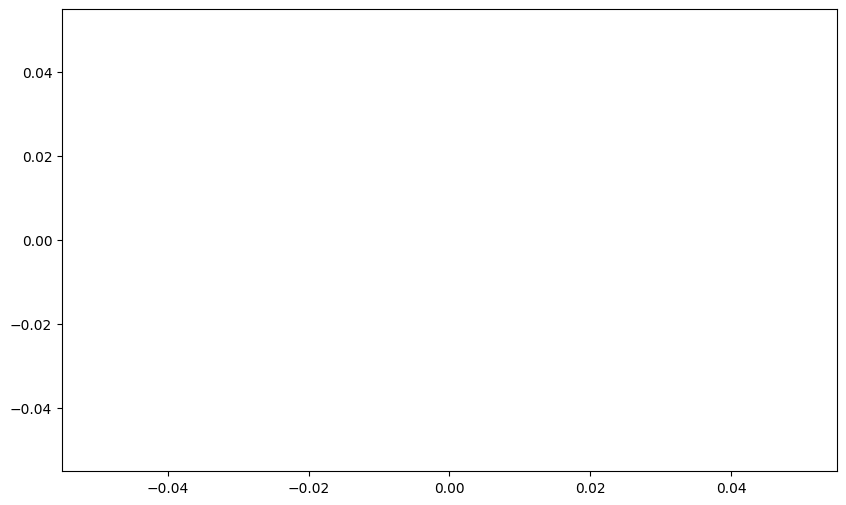

In [24]:
# 2次元プロット
plt.figure(figsize=(10, 6))
plt.scatter(df_sampled['Mean Return (Annualized)'], df_sampled['PER'], color='blue')

In [5]:
# CSVファイルからティッカーとリターンが入ったデータを読み込む
data_df = pd.read_csv('returns_and_risk_summary.csv')

# 各ティッカーに対してPERを取得し、新しい列を追加
data_df['PER'] = data_df['Ticker'].apply(get_per)

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))